<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S12_C3_CNN_Binary_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

[CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1. Cargar los Datos

In [2]:
if(os.path.exists("pizza_steak")):
  print("Files already exist")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
  zip_ref.extractall()
  zip_ref.close()
  !rm pizza_steak.zip

--2024-12-19 02:39:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.2MB/s    in 5.9s    

2024-12-19 02:39:42 (17.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak/

test  train


# Parte 2. Inspeccionar los dastos

In [4]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=b9eaa020acf859216c94a7ac6c8ad057cbc9aab8710376362fd702334415e0e9
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [5]:
import pathlib
import numpy as np
import random

In [6]:
from utils import *

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [9]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


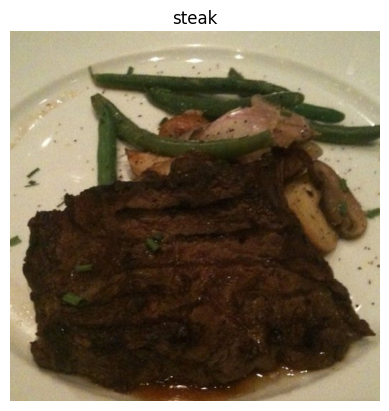

In [11]:
random_class = random.choice(class_names)
img = view_random_image(target_dir="pizza_steak/train/", target_class=random_class)

In [12]:
# Results Dictionary
all_results = {
    "models" : ["model_1", "model_2", "model_3", "model_4"],
    "acc" : [],
    "loss" : [],
}

# Parte 3.Preprosesamiento

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [15]:
train_generator = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/255.)

In [16]:
train_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes para poder usar 2D
    class_mode = "binary", # Calses binarias
    seed = 42, # Semilla asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

valid_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Calses binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False,
    subset = "validation" # Subconjunto de entrenamiento
)

test_data = train_generator.flow_from_directory(
    directory = test_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Calses binarias
    seed = 42, # Semilla
    batch_size = 32, # Tamaño del batch
    shuffle = False,
)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
images, labels = next(train_data)

(224, 224, 3)


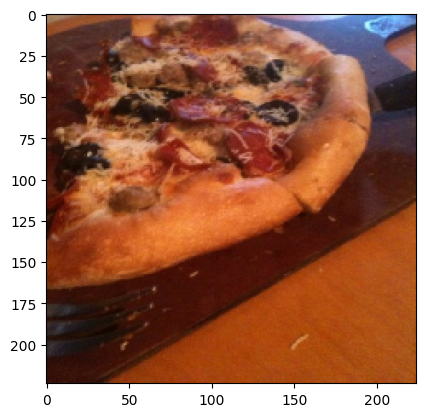

In [18]:
imgs = 20
print(images[imgs].shape)
plt.imshow(images[imgs])

# Parte 4.A. Crear el modelo

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, padding="valid", activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 216, 216, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 466560)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         466,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469,571 (1.79 MB)

 Trainable params: 469,571 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 4.B. Entrenar el modelo



In [23]:
import numpy as np

In [24]:
batch_size = 32
history_1 = model_1.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 0.5320 - loss: 0.7731 - val_accuracy: 0.6733 - val_loss: 0.5722
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.7834 - loss: 0.4568 - val_accuracy: 0.6633 - val_loss: 0.6834
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8495 - loss: 0.3661 - val_accuracy: 0.7333 - val_loss: 0.5624
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9155 - loss: 0.2240 - val_accuracy: 0.6933 - val_loss: 0.9376
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9653 - loss: 0.1276 - val_accuracy: 0.7400 - val_loss: 0.7487
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9943 - loss: 0.0470 - val_accuracy: 0.7100 - val_loss: 0.9988


In [25]:
history_uno = model_1.fit(train_data,
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose=1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9950 - loss: 0.0239 - val_accuracy: 0.7133 - val_loss: 1.0355
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/6


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.7033 - val_loss: 1.3131
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.7200 - val_loss: 1.2557
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [26]:
# Número de lotes
1200/32

37.5

# Parte 4.C. probar el modelo

In [27]:
scores_1 = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8056 - loss: 0.7206


In [28]:
def plot_train_curves(history):
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.title("Training and Validation and Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()


  plt.figure(figsize=(12,2))
  plt.subplot(1,2,2)
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.title("Training and Validation and Lossy")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8056 - loss: 0.7206


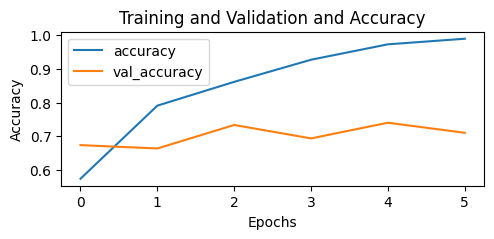

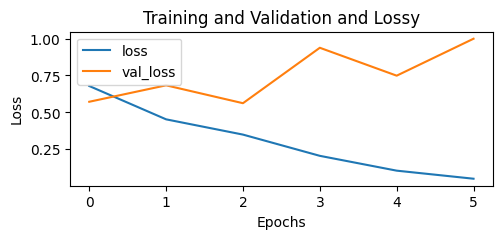

In [29]:
scores_1 = model_1.evaluate(test_data)
plot_train_curves(history_1)

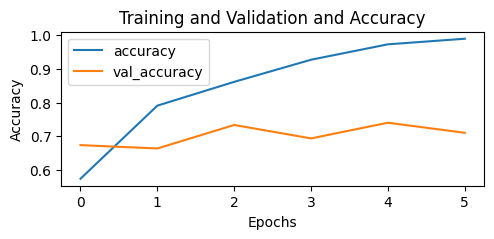

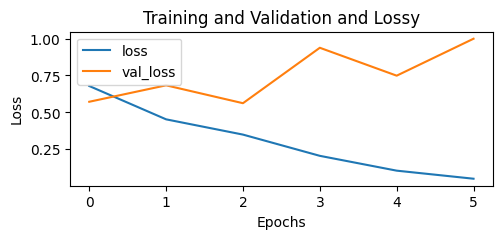

In [30]:
plot_train_curves(history_1)

El rendimiento del entrenamiento es escelente es casi una exactitud/accuracy de 100%

El rendimiento de la validacion es muy bajoa al final es del 70%

Esto es una muestra que el modelo se sobreajusto(overfiting)

**Que hacer para disminuir el sobreajuste**

* Aumentar los datos
* Regularizacion (pooling, dropout)
* Disminuirla complejidad del modelo (en este caso 4 capas convolucionales secuenciales)

# Parte 5.A. Crear modelo 2

In [31]:
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 5.B. Entrenar modelo 2

In [32]:
batch_size = 32
history_2 = model_2.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.6450 - loss: 0.6454 - val_accuracy: 0.7133 - val_loss: 0.5426
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7988 - loss: 0.4707 - val_accuracy: 0.7967 - val_loss: 0.4781
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8204 - loss: 0.4113 - val_accuracy: 0.7967 - val_loss: 0.4793
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8442 - loss: 0.3603 - val_accuracy: 0.7667 - val_loss: 0.5152
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8292 - loss: 0.3841 - val_accuracy: 0.7567 - val_loss: 0.5173
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8518 - loss: 0.3571 - val_accuracy: 0.8167 - val_loss: 0.4721


% Parte 5.C Probar el modelo

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8747 - loss: 0.2938


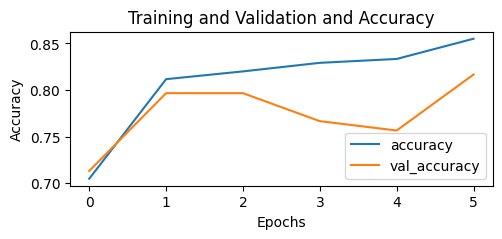

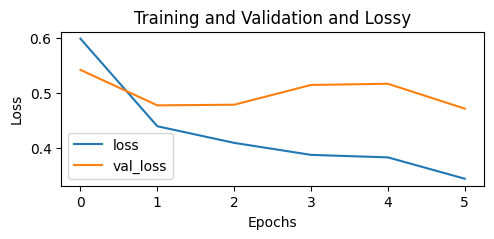

In [33]:
scores_2 = model_2.evaluate(test_data)
plot_train_curves(history_2)

In [34]:
from tensorflow.keras.layers import AveragePooling2D

In [35]:
model_3 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [36]:
batch_size = 32
history_3 = model_3.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.6089 - loss: 0.6541 - val_accuracy: 0.6833 - val_loss: 0.5849
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7795 - loss: 0.5165 - val_accuracy: 0.7367 - val_loss: 0.5680
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7655 - loss: 0.5051 - val_accuracy: 0.7500 - val_loss: 0.5236
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7819 - loss: 0.4726 - val_accuracy: 0.7500 - val_loss: 0.5250
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8167 - loss: 0.4109 - val_accuracy: 0.7767 - val_loss: 0.4859
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.8437 - loss: 0.3806 - val_accuracy: 0.7667 - val_loss: 0.4973


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8312 - loss: 0.4030


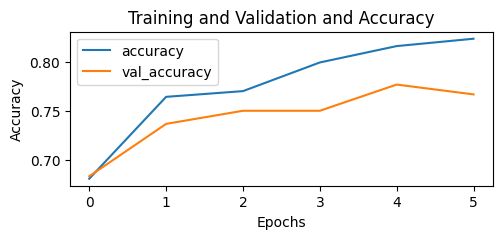

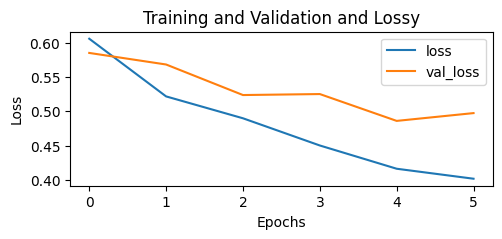

In [37]:
scores_3 = model_3.evaluate(test_data)
plot_train_curves(history_3)

In [38]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [39]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=20, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [40]:
batch_size = 32
history_4 = model_4.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.6022 - loss: 0.6403 - val_accuracy: 0.7400 - val_loss: 0.5644
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7802 - loss: 0.4818 - val_accuracy: 0.7800 - val_loss: 0.4894
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8156 - loss: 0.4290 - val_accuracy: 0.7667 - val_loss: 0.5077
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8180 - loss: 0.3909 - val_accuracy: 0.7600 - val_loss: 0.5055
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8411 - loss: 0.3549 - val_accuracy: 0.7667 - val_loss: 0.5259
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8424 - loss: 0.3679 - val_accuracy: 0.7300 - val_loss: 0.5760


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8999 - loss: 0.2833


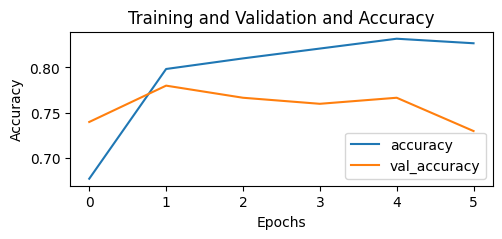

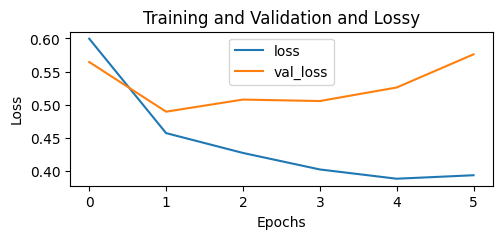

In [41]:
scores_4 = model_4.evaluate(test_data)
plot_train_curves(history_4)

In [42]:
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=20, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=40, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [43]:
batch_size = 32
history_5 = model_5.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5983 - loss: 0.6648 - val_accuracy: 0.7367 - val_loss: 0.5988
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.7466 - loss: 0.5500 - val_accuracy: 0.7467 - val_loss: 0.5727
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7645 - loss: 0.4851 - val_accuracy: 0.7733 - val_loss: 0.4953
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8172 - loss: 0.4355 - val_accuracy: 0.7667 - val_loss: 0.4982
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.8245 - loss: 0.4143 - val_accuracy: 0.7667 - val_loss: 0.5083
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8301 - loss: 0.3999 - val_accuracy: 0.7800 - val_loss: 0.4881


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.8933 - loss: 0.3100


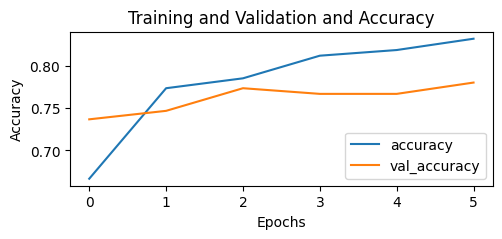

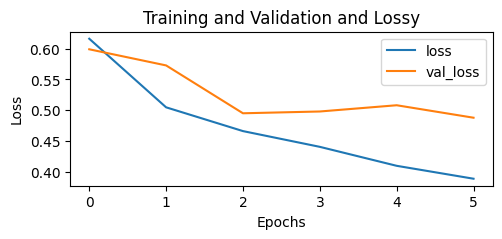

In [44]:
scores_5 = model_5.evaluate(test_data)
plot_train_curves(history_5)

# Parte 3.B. Reducir el sobreajuste con Data Augmentation

Data augmentation: es una tecnica que aumenta el numero de entrenamiento

* Rotar la imagen
* Inclinar la imagen
* Zoom
* Desplazar horizontal
* Desplazar vertical
* Voltear
* Rellenar pixeles vacios

In [45]:
# Generar imagenes aunmentadas
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2, # Rotar la imagen con un rango de 20%
    shear_range = 0.2, # Inclinación de la imagen
    zoom_range = 0.2, # Zoom
    width_shift_range = 0.2, # Desplazamiento horizontal
    height_shift_range = 0.2, # Desplazamiento vertical
    horizontal_flip = True, # Voltear horizontalmente
    fill_mode = "reflect", # Rellenar pixeles vacios
    validation_split = 0.2
)

# Generar imagener sin aumentar
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [46]:

# Importar los datos y aplicar el ImageDataGenerator

train_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

train_data_2 = train_datagen.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)



Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [47]:
images, labels = next(train_data_2)
images_aug, labels_aug = next(train_data_augmented)

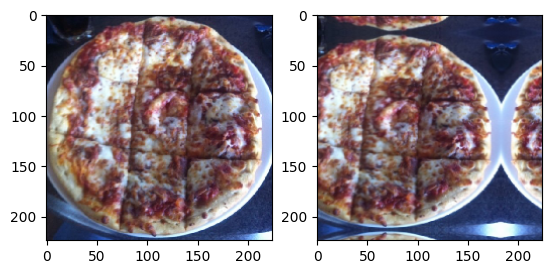

In [48]:
import random

random_img = random.randint(0,31)
plt.subplot(1,2,1)
plt.imshow(images[random_img])
plt.subplot(1,2,2)
plt.imshow(images_aug[random_img])

In [49]:
valid_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False, #
    subset = "validation" # Subconjunto de validación
)

Found 300 images belonging to 2 classes.


# Parte 6.A. Crear modelo3 (el mismo modle_2)

# Parte 6.B. Entrenar el modelo

In [50]:
MaxPool2D = MaxPooling2D

In [51]:

model_3 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_3 = model_3.fit(train_data_augmented,
                        epochs=6,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 486ms/step - accuracy: 0.5057 - loss: 0.6884 - val_accuracy: 0.6267 - val_loss: 0.6472
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 495ms/step - accuracy: 0.6285 - loss: 0.6482 - val_accuracy: 0.6733 - val_loss: 0.6059
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 474ms/step - accuracy: 0.6611 - loss: 0.6098 - val_accuracy: 0.7067 - val_loss: 0.5923
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/step - accuracy: 0.7267 - loss: 0.5432 - val_accuracy: 0.7567 - val_loss: 0.5046
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 444ms/step - accuracy: 0.7301 - loss: 0.5293 - val_accuracy: 0.7333 - val_loss: 0.5435
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 437ms/step - accuracy: 0.7827 - loss: 0.4890 - val_accuracy: 0.7067 - val_loss: 0.5419


# Parte 6.C. probar el modelo

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8627 - loss: 0.3623


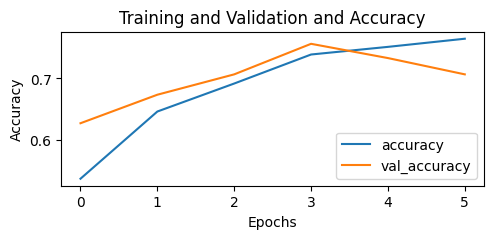

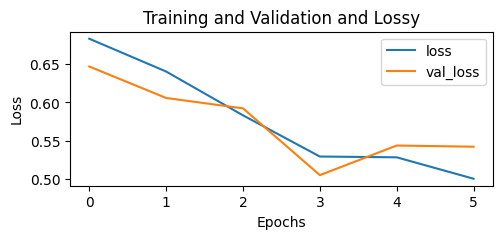

In [52]:
scores_3  = model_3.evaluate(test_data)
plot_train_curves(history_3)

* Experimento 1. 4 capas convolucionales  Data: Original Diferencia(train-valid): 26-30%
* Experimento 2. (conv2D+Maxpool)x3  Data: Original Original Diferencia(train-valid): 7-9%
* Experimento 3. (conv2D+Maxpool)x3  Data: Original Augmentada Diferencia(train-valid): 1-2% (accuracy esta en 76%)

Opciones para seguir mejorando

* Aumentar capas convolucionales
* Aumentar filtros en las capas convolucionales
* Agregar mas capas densas
* Aumentar Epocas
* Modificar el compilador de la red (tasas de aprendizaje, adam: tasa de aprendizaje ajustable)

# Parte 7.A.B Crear y entrenar el modelo

Experimento 4: cuasi_VGG" Data: Augmentada

In [53]:
model_4 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_4 = model_4.fit(train_data_augmented,
                        epochs=6,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 675ms/step - accuracy: 0.6129 - loss: 0.6408 - val_accuracy: 0.6567 - val_loss: 0.5879
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 482ms/step - accuracy: 0.6755 - loss: 0.5726 - val_accuracy: 0.7233 - val_loss: 0.5589
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.7588 - loss: 0.5085 - val_accuracy: 0.7733 - val_loss: 0.4916
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 530ms/step - accuracy: 0.8012 - loss: 0.4644 - val_accuracy: 0.7300 - val_loss: 0.5415
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 438ms/step - accuracy: 0.7324 - loss: 0.5340 - val_accuracy: 0.7900 - val_loss: 0.4504
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 492ms/step - accuracy: 0.8016 - loss: 0.4423 - val_accuracy: 0.7533 - val_loss: 0.4903


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.7988 - loss: 0.4206


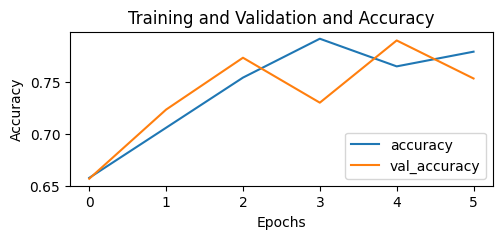

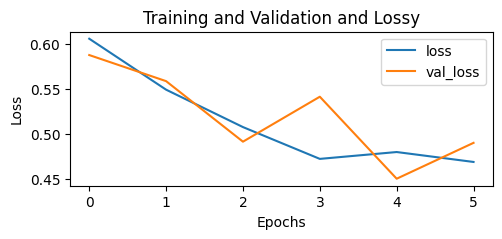

In [54]:
scores_4  = model_4.evaluate(test_data)
plot_train_curves(history_4)

In [55]:
history_5 = model_4.fit(train_data_augmented,
                        epochs=10,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 450ms/step - accuracy: 0.8002 - loss: 0.4330 - val_accuracy: 0.7733 - val_loss: 0.4796
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.8159 - loss: 0.4345 - val_accuracy: 0.7933 - val_loss: 0.4477
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 434ms/step - accuracy: 0.7972 - loss: 0.4410 - val_accuracy: 0.7900 - val_loss: 0.4374
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 439ms/step - accuracy: 0.8173 - loss: 0.3942 - val_accuracy: 0.8200 - val_loss: 0.4497
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 485ms/step - accuracy: 0.8339 - loss: 0.3915 - val_accuracy: 0.7800 - val_loss: 0.4695
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 464ms/step - accuracy: 0.8161 - loss: 0.3752 - val_accuracy: 0.8067 - val_loss: 0.4147
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 430ms/step - accuracy: 0.8397 - loss: 0.3749 - val_accuracy: 0.8233 - val_loss: 0.4194
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.8518 - loss: 0.3627 - val_accu

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9059 - loss: 0.2534


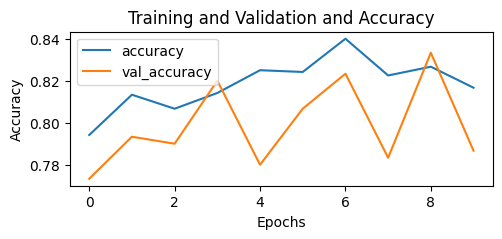

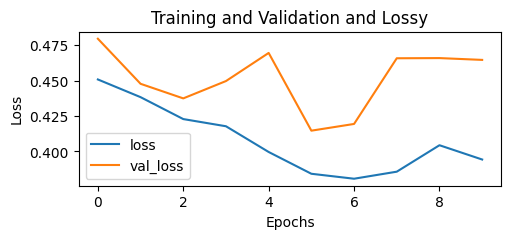

In [56]:
scores_5  = model_4.evaluate(test_data)
plot_train_curves(history_5)

# parte 8.A.B Crear y entrenar el modelo 6

* Experimento con VGG 2 Data: augmentada

In [57]:
model_6 = Sequential([Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=32, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=64, kernel_size=3,  activation="relu"),
                      Conv2D(filters=64, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_6.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_6 = model_6.fit(train_data_augmented,
                        epochs=6,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 853ms/step - accuracy: 0.4982 - loss: 0.7792 - val_accuracy: 0.5900 - val_loss: 0.6696
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 464ms/step - accuracy: 0.6503 - loss: 0.6222 - val_accuracy: 0.7467 - val_loss: 0.5240
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 503ms/step - accuracy: 0.7483 - loss: 0.5320 - val_accuracy: 0.6733 - val_loss: 0.6821
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 452ms/step - accuracy: 0.7780 - loss: 0.4957 - val_accuracy: 0.7600 - val_loss: 0.5069
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.7863 - loss: 0.4683 - val_accuracy: 0.7767 - val_loss: 0.4776
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.7925 - loss: 0.4684 - val_accuracy: 0.7933 - val_loss: 0.4483


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.7668 - loss: 0.4800


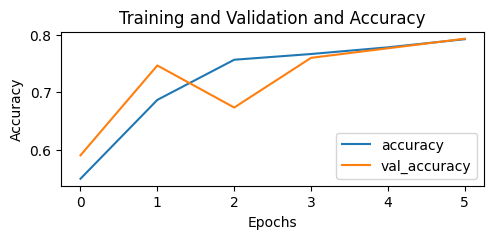

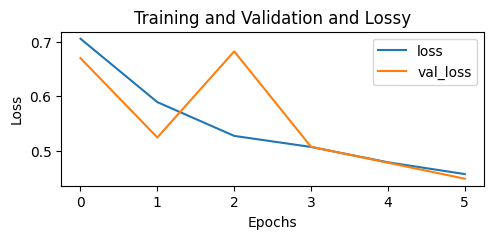

In [58]:
scores_6 = model_6.evaluate(test_data)
plot_train_curves(history_6)

In [59]:
model_7 = Sequential([Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=32, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=64, kernel_size=3,  activation="relu"),
                      Conv2D(filters=64, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_7.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_7 = model_7.fit(train_data_augmented,
                        epochs=10,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 575ms/step - accuracy: 0.5424 - loss: 0.8072 - val_accuracy: 0.7633 - val_loss: 0.5209
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 489ms/step - accuracy: 0.7319 - loss: 0.5508 - val_accuracy: 0.7700 - val_loss: 0.4851
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 473ms/step - accuracy: 0.7762 - loss: 0.4829 - val_accuracy: 0.7700 - val_loss: 0.4672
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 463ms/step - accuracy: 0.7800 - loss: 0.4755 - val_accuracy: 0.7767 - val_loss: 0.4825
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 486ms/step - accuracy: 0.7675 - loss: 0.5467 - val_accuracy: 0.7500 - val_loss: 0.5395
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.7893 - loss: 0.4678 - val_accuracy: 0.7133 - val_loss: 0.6187
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.7566 - loss: 0.5395 - val_accuracy: 0.7367 - val_loss: 0.5270
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 459ms/step - accuracy: 0.8151 - loss: 0.4479 - val_accu

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7520 - loss: 0.5966


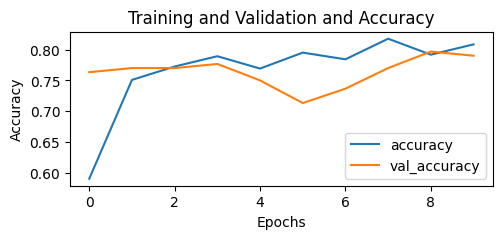

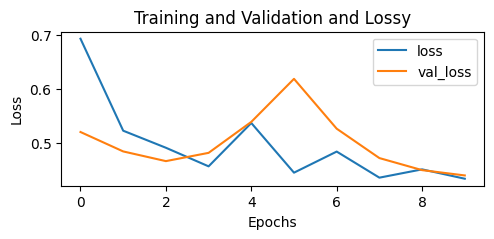

In [60]:
scores_7 = model_7.evaluate(test_data)
plot_train_curves(history_7)

In [61]:
scores_1

[0.7948171496391296, 0.7860000133514404]

# Matriz de confisión

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
y_test = test_data.labels
y_predict = np.squeeze(model_6.predict(test_data))
threshold = 0.5
y_pred = (y_predict > threshold).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [69]:
cf_matrix_m6 = confusion_matrix(y_test, y_pred)

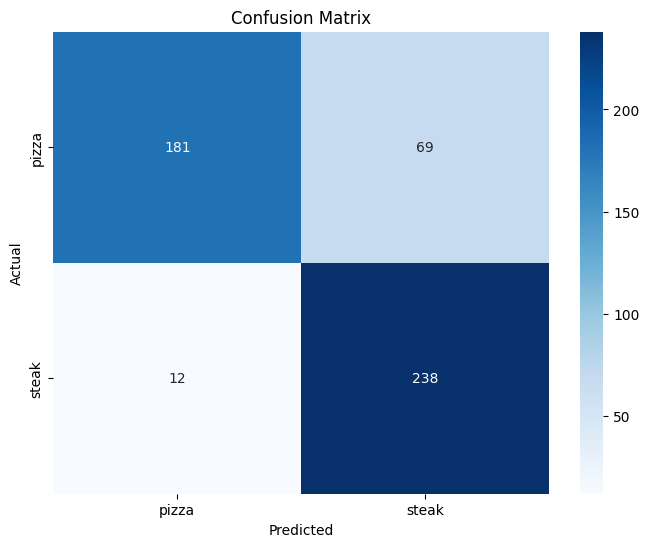

              precision    recall  f1-score   support

       pizza       0.94      0.72      0.82       250
       steak       0.78      0.95      0.85       250

    accuracy                           0.84       500
   macro avg       0.86      0.84      0.84       500
weighted avg       0.86      0.84      0.84       500



In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_m6, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


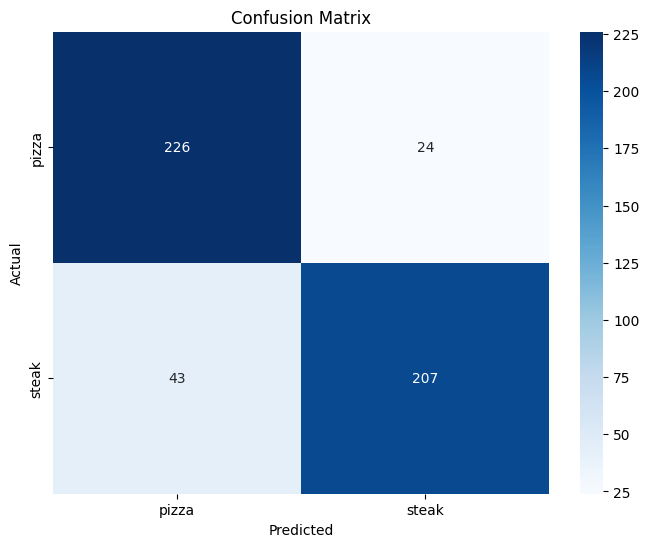

              precision    recall  f1-score   support

       pizza       0.84      0.90      0.87       250
       steak       0.90      0.83      0.86       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [71]:
y_test = test_data.labels
y_predict = np.squeeze(model_5.predict(test_data))
threshold = 0.5
y_pred = (y_predict > threshold).astype(int)
cf_matrix_m5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_m5, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


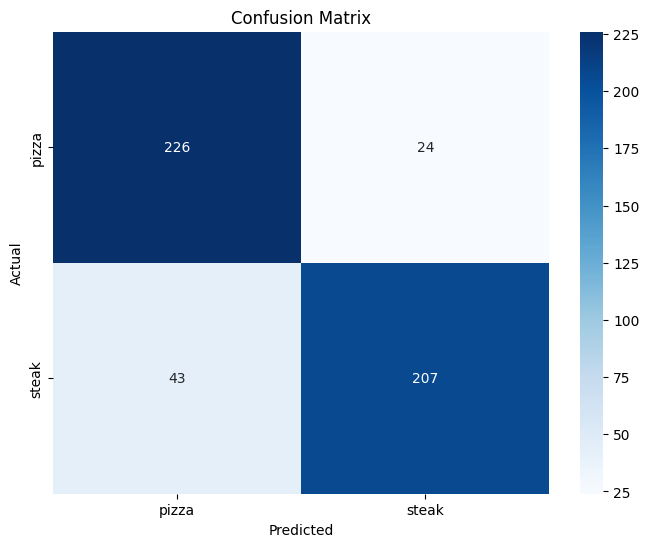

              precision    recall  f1-score   support

       pizza       0.93      0.71      0.80       250
       steak       0.76      0.94      0.84       250

    accuracy                           0.83       500
   macro avg       0.85      0.83      0.82       500
weighted avg       0.85      0.83      0.82       500



In [72]:
y_test = test_data.labels
y_predict = np.squeeze(model_7.predict(test_data))
threshold = 0.5
y_pred = (y_predict > threshold).astype(int)
cf_matrix_m7 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_m5, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=class_names))

In [73]:
model_5.save("model_5.h5")